In [1]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model

In [2]:
def train_generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

In [3]:
def validation_generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

In [4]:
def test_generator(dir, gen=image.ImageDataGenerator(rescale=1./255,rotation_range=40), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

In [5]:
BS= 32
TS=(24,24)
train_batch= train_generator('dataset_new/partial_train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= validation_generator('dataset_new/validation',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_new/partial_train'

In [15]:
train_batch.class_indices

{'.ipynb_checkpoints': 0, 'Closed': 1, 'Open': 2, 'no_yawn': 3, 'yawn': 4}

In [8]:
test_batch=test_generator("dataset_new/test",shuffle=True,batch_size=BS,target_size=TS)


Found 1618 images belonging to 5 classes.


In [26]:
# img,labels= next(train_batch)
# print(img.shape)

In [9]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
    Dense(128,activation="relu"),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(5, activation='softmax')
])




model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_batch,validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)

        
        
        


    

Epoch 1/15
112/112 [==============================] - 13s 106ms/step - loss: 0.7692 - accuracy: 0.6926 - val_loss: 0.3245 - val_accuracy: 0.9003
Epoch 2/15
112/112 [==============================] - 11s 97ms/step - loss: 0.3325 - accuracy: 0.8963 - val_loss: 0.3237 - val_accuracy: 0.8936
Epoch 3/15
112/112 [==============================] - 11s 94ms/step - loss: 0.2171 - accuracy: 0.9337 - val_loss: 0.2538 - val_accuracy: 0.9181
Epoch 4/15
112/112 [==============================] - 10s 90ms/step - loss: 0.1573 - accuracy: 0.9486 - val_loss: 0.3532 - val_accuracy: 0.8818
Epoch 5/15
112/112 [==============================] - 10s 91ms/step - loss: 0.1233 - accuracy: 0.9584 - val_loss: 0.2513 - val_accuracy: 0.9333
Epoch 6/15
112/112 [==============================] - 10s 89ms/step - loss: 0.0867 - accuracy: 0.9713 - val_loss: 0.2793 - val_accuracy: 0.9282
Epoch 7/15
112/112 [==============================] - 10s 91ms/step - loss: 0.0761 - accuracy: 0.9784 - val_loss: 0.2571 - val_accuracy

In [10]:
y_pred=model.evaluate(test_batch)

51/51 [==============================] - 3s 50ms/step - loss: 0.8108 - accuracy: 0.8022


Text(0.5, 1.0, 'Loss')

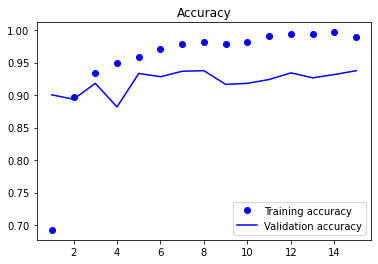

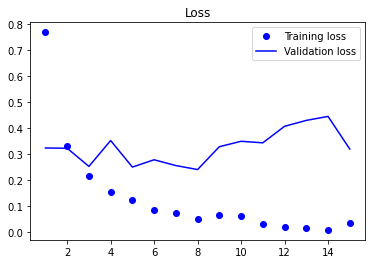

In [11]:
import matplotlib.pyplot as plt
train_acc=history.history["accuracy"]
validation_acc=history.history["val_accuracy"]
train_loss=history.history["loss"]
validation_loss=history.history["val_loss"]

no_epochs=range(1,len(train_acc)+1)

plt.plot(no_epochs,train_acc,"bo",label="Training accuracy")
plt.plot(no_epochs,validation_acc,"b",label="Validation accuracy")
plt.legend()
plt.title("Accuracy")

plt.figure()
plt.plot(no_epochs,train_loss,"bo",label="Training loss")
plt.plot(no_epochs,validation_loss,"b",label="Validation loss")
plt.legend()
plt.title("Loss")




In [12]:
model.save('cnnCat2.h5', overwrite=True)